<h1>Activity Recognition</h1>
<h3>Dylan Walseth</h3>

I decided to my final project on Activity recognition, as defined by Wikipedia to be:

"Activity recognition aims to recognize the actions and goals of one or more agents from a series of observations on the agents' actions and the environmental conditions. Since the 1980s, this research field has captured the attention of several computer science communities due to its strength in providing personalized support for many different applications and its connection to many different fields of study such as medicine, human-computer interaction, or sociology.

To understand activity recognition better, consider the following scenario. An elderly man wakes up at dawn in his small studio apartment, where he stays alone. He lights the stove to make a pot of tea, switches on the toaster oven, and takes some bread and jelly from the cupboard. After he takes his morning medication, a computer-generated voice gently reminds him to turn off the toaster. Later that day, his daughter accesses a secure website where she scans a check-list, which was created by a sensor network in her father's apartment. She finds that her father is eating normally, taking his medicine on schedule, and continuing to manage his daily life on his own. That information puts her mind at ease.

Many different applications have been studied by researchers in activity recognition; examples include assisting the sick and disabled. For example, Pollack et al.[1] show that by automatically monitoring human activities, home-based rehabilitation can be provided for people suffering from traumatic brain injuries. One can find applications ranging from security-related applications and logistics support to location-based services. Due to its many-faceted nature, different fields may refer to activity recognition as plan recognition, goal recognition, intent recognition, behavior recognition, location estimation and location-based services."


<h3>Why did I pick this topic?</h3>
After looking into this topic for a bit now, it looks really interesting, as recent ideas have come out using this method, the biggest example being 'Fitbit' which will be able to determine what activity you are performing without having to tell it, and will try to determine what it should do relating to this. I saw a cool idea being that music would start playing when you would jog, or calm noises play when you are lying down (trying to sleep).

<h3>References & Data source</h3>
Data provided by:
http://www.cis.fordham.edu/wisdm/dataset.php<br>

Following closely with:
http://www.cis.fordham.edu/wisdm/includes/files/sensorKDD-2010.pdf<br>

Other references include:<br>
http://www.jmaxkanter.com/static/papers/activity_classification.pdf<br>
http://www.ess.tu-darmstadt.de/sites/default/files/act_rec/actrec_1.html#/title<br>
http://www.cis.fordham.edu/wisdm/<br>
https://www.youtube.com/watch?v=C7JQ7Rpwn2k<br>
http://www.unwiredview.com/2009/05/21/google-wants-to-make-your-android-phone-much-smarter-with-accelerometer-and-other-sensors/<br>
https://en.wikipedia.org/wiki/Activity_recognition<br>


<h2>REQUIRED DOWNLOAD!!!</h2>
https://github.com/renatopp/liac-arff

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
# from scipy.io import arff
# External arff loading lib, see https://github.com/renatopp/liac-arff
import arff

dataset = arff.load(open('WISDM_ar_v1.1_transformed_cleaned.arff', 'r'))
data = np.array(dataset['data'])

frame = pd.DataFrame(data=data, columns=['UNIQUE_ID', 'user', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y0',
        'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9',
        'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'XSTANDDEV', 'YSTANDDEV',
        'ZSTANDDEV', 'RESULTANT', 'ACTIVITY' ])

This data being:
<br>• **Average**: Average acceleration (for each axis)
<br>• **Standard Deviation**: Standard deviation (for each axis)
<br>• **Average Absolute Difference**: Average absolute difference between the value of each of the 200 readings within the ED and the mean value over those 200 values (for each axis)
<br>• **Average Resultant Acceleration**: Average of the square roots of the sum of the values of each axis squared over the ED ![equation](eqn.png)
<br>• **Time Between Peaks**: Time in milliseconds between peaks in the sinusoidal waves associated with most activities (for each axis)
<br>• **Binned Distribution**: We determine the range of values for each axis (maximum – minimum), divide this range into 10 equal sized bins, and then record what fraction of the 200 values fell within each of the bins.

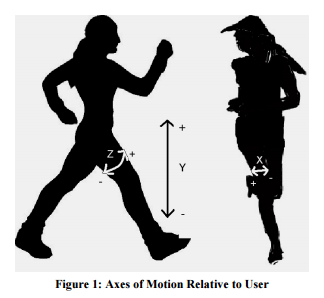

In [2]:
from IPython.display import Image
Image(filename='data-info.png') 

The obvious way to use this data would be to split the data into a training set and testing set, as the data provided allows us to do some sort of supervised classification learning, using the fact that we have some inputs we know are associated with an activity. We would be able to use these inputs to train an algorithm (wisdm used Logistical Regression for one of their examples) and then evaluate the accuracy by comparing it to the testing set, giving only the inputs, and comparingthem to know outputs.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# plots within notebook versus launching a separate window
%matplotlib inline 

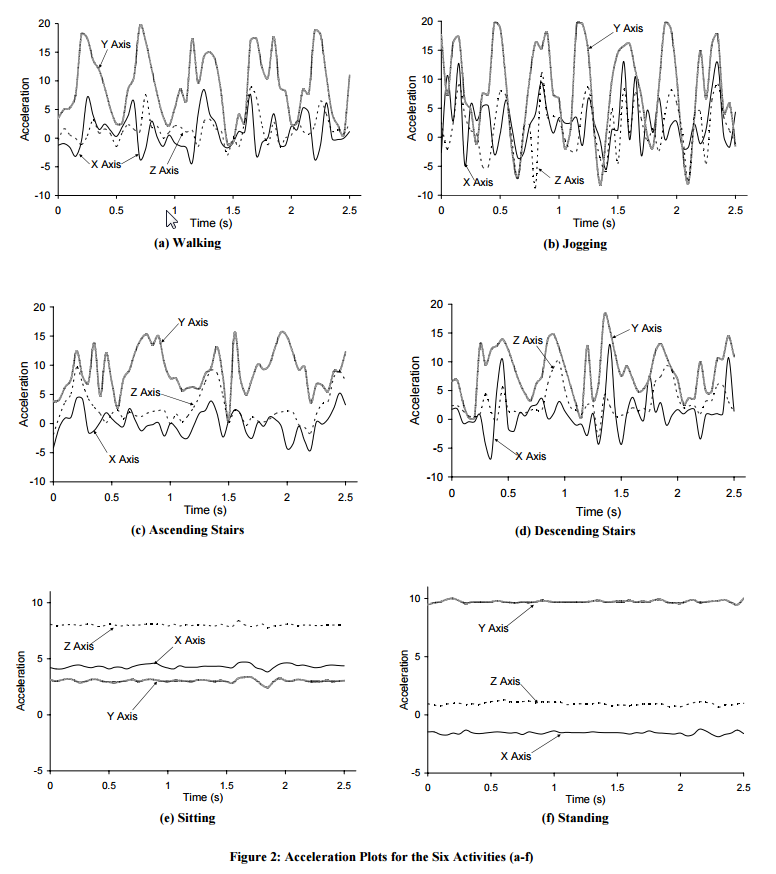

In [4]:
# If we look at the plots generated by looking at the acceleration plots for the data collected
# These were pre-generated by/and availible on this document http://www.cis.fordham.edu/wisdm/includes/files/sensorKDD-2010.pdf
Image(filename='plots.png') 

In [5]:
# Clean data and setup training and testing data
from sklearn.cross_validation import train_test_split

frame.replace([np.inf, -np.inf], np.nan, inplace=True)
frame.replace('None', 0, inplace=True)
frame.fillna(value=0, inplace=True)

X = frame[['UNIQUE_ID', 'user', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y0',
        'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9',
        'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'XSTANDDEV', 'YSTANDDEV',
        'ZSTANDDEV', 'RESULTANT']]

# X = frame[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV',
#                            'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'RESULTANT']]

y = frame[['ACTIVITY']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import numpy as np

activity = LogisticRegression()
activity.fit(X_train.values, y_train.values)

print activity.score(X_test.values, y_test.values)

0.759507829978


In [7]:
# Maybe clean up some of the data? Less noise?

X = frame[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV',
                           'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'RESULTANT']]

y = frame[['ACTIVITY']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

activity2 = LogisticRegression()
activity2.fit(X_train.values, y_train.values)

activity2.score(X_test.values, y_test.values)

0.75615212527964204

In [8]:
# Maybe having user include could help? And maybe use more training data?

X = frame[['user', 'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV',
                           'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'RESULTANT']]

y = frame[['ACTIVITY']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

activity2 = LogisticRegression()
activity2.fit(X_train.values, y_train.values)

activity2.score(X_test.values, y_test.values)

0.75553505535055354

<h2>Analysis and Lessons Learned</h2>

Using this method (Logistic Regression), we are able to determine with a ~76% accuracy of which activity the user is performing, hopefully this method could be improved with more data, but overall I was close to the accuracy that WISDM achieved using Logistic Regression based on this chart:

![WISDM Accuracy Chart](accuracy-chart.png)

I feel like I learned a lot about how data like this could be used to track activity, as well as make recommendations for what to do. Using this, combined with other machine learning techiques, we could determine if your headphones should start playing intense music when you start jogging, or calm music when you lie down to go to sleep.


There are several ways to track activity, such as computer vision, accelerometer data, gps data, heartrate, etc... For this lab, I used only one of these (accelerometer) and was able to get an accuracy of ~76%. I could see this tech going far in the upcoming years as many phones/smartwatches integrate this type of behavior.